In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_local
from sklearn import preprocessing as skp
import os
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature, filters

In [2]:
florence_high = 0.0602297680188402
florence_low = 0.030341311708739042
harvey_high = 0.04187062257046257
harvey_low = 0.021092719640759337
midlandmi_high = 0.02946354990124829
midlandmi_low = 0.014842540175816805
swharvey_high = 0.05172780328678149
swharvey_low = 0.0260583670692809

In [3]:
# NDWI and ABWI
florence_high = 0.15838871342694766
florence_low = 0.07978980300455257
harvey_high = 0.08518270309056243
harvey_low = 0.04291158727118558
midlandmi_high = -0.00048465219902857565
midlandmi_low = -0.0009620707831462772
swharvey_high = 0.1353842426718792
swharvey_low = 0.06820108465425492

In [4]:
def diff(pre,post):
    return post-pre

In [5]:
def hysteresis(img,low,high):
    gauss = ndi.gaussian_filter(img,sigma=1)
    sobel = filters.sobel(gauss)
    lowt = (sobel > low).astype(int)
    hight = (sobel > high).astype(int)
    hyst = filters.apply_hysteresis_threshold(sobel, low, high)
    return (hight+hyst)==2

In [6]:
def canny(img):
    gauss = ndi.gaussian_filter(img, 1)
    # Compute the Canny filter for sigma=3
    edges = feature.canny(gauss, sigma=3)
    return edges

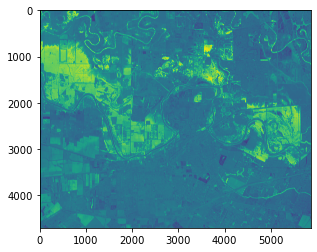

In [7]:
harvey_pre = np.load('harvey_train/harvey_ndwi_pre.npy')
harvey_post = np.load('harvey_train/harvey_ndwi_post.npy')
harvey = harvey_post-harvey_pre
plt.imshow(harvey)

In [8]:
harvey_std = np.std(harvey)
harvey_mu = np.mean(harvey)
harvey_std,harvey_mu

(0.17037017894253842, 0.09695612281159702)

In [9]:
harvey_thresh = np.load('harvey_train/harvey_125.npy')
har_knn = np.load('harvey_train/harvey_knn.npy')

(-0.5, 5859.5, 4704.5, -0.5)

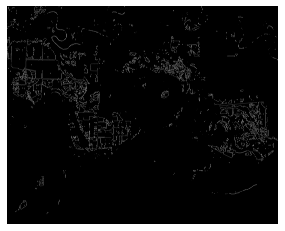

In [10]:
hys=hysteresis(harvey_thresh,swharvey_low,swharvey_high)
plt.imshow(hys,cmap='gray')
plt.axis('off')

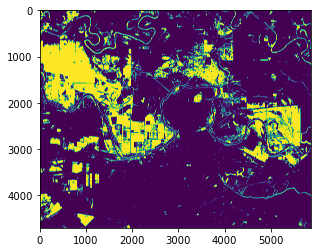

In [11]:
harvey_knn = np.load('harvey_train/harvey_knn.npy')
plt.imshow(harvey_knn)

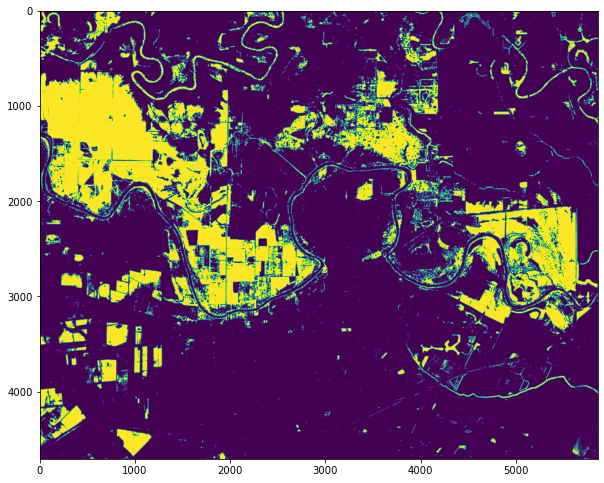

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(harvey_knn)

In [13]:
def denoise(can,ndwi):
    kernel = np.ones((9,9),np.uint8)
    dilation = ndi.binary_dilation(can,kernel,iterations=30)
    both = np.logical_and(ndwi,dilation)
    return both

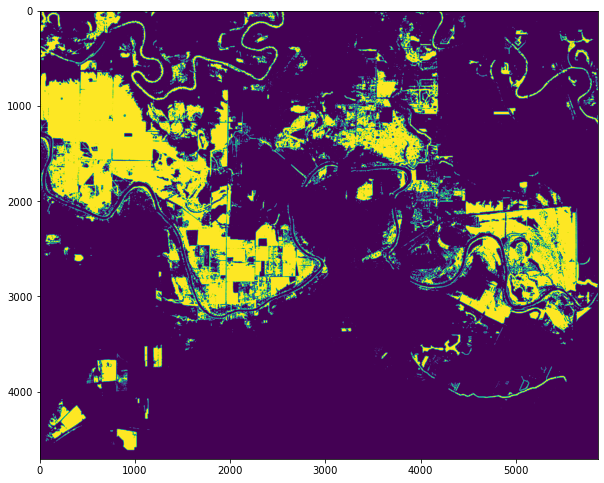

In [14]:
harvey_wl = denoise(hys,harvey_knn)
plt.figure(figsize=(10,10))
plt.imshow(harvey_wl)
# np.save('harvey_train/harvey_wl_before_smoothing',harvey_wl)